# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [1]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [4]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
  y_return = []
  for i in y:
    label = [0]*10
    label[i] = 1
    y_return.append(label)
  return y_return

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [5]:
#code here
def model_architecture():
  model = keras.models.Sequential()
  model.add(keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = "same",activation="relu",input_shape = [28,28,1]))
  model.add(keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = "same",activation="relu"))
  model.add(keras.layers.MaxPool2D(pool_size=2))
  model.add(keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = "same",activation="relu"))
  model.add(keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = "same",activation="relu"))
  model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
  model.add(keras.layers.Flatten())
  # model.add(keras.layers.Dense(units=512,activation="relu"))
  model.add(keras.layers.Dense(units=128,activation="relu"))
  model.add(keras.layers.Dense(units=10,activation="softmax"))
  return model  

In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [8]:
model = model_architecture()
model.summary()
# model.compile(keras.optimizers.SGD, loss=keras.losses.categorical_crossentropy, metrics=list(keras.metrics.Accuracy))
model.compile(optimizer = "sgd",loss='categorical_crossentropy',metrics=["accuracy"])
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2,mode="auto",verbose=1,restore_best_weights = True)
callback1 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,mode="auto",verbose=1,restore_best_weights = True)                                
history = model.fit(x_train,y_train,batch_size = 32,epochs = 20,verbose = 1,callbacks = [callback,callback1],validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [9]:
print("Training-Accuracy:",history.history['accuracy'][-1])
print("Testing-Accuracy:",history.history['val_accuracy'][-1])

Training-Accuracy: 0.9955499768257141
Testing-Accuracy: 0.9902999997138977


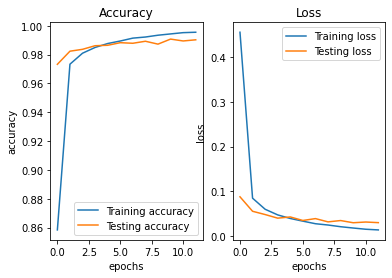

In [10]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


In [ ]:
def randomize(y_train,percent):
  for i in range(int(len(y_train)*percent/100)):
    y_train[i] = [0] * 10
    y_train[i][random.randint(0,9)] = 1 
  return y_train

In [ ]:
y_train_original = y_train

Epoch 1/20
1875/1875 [==============================] - 33s 18ms/step - loss: 1.2434 - accuracy: 0.7049 - val_loss: 0.4709 - val_accuracy: 0.9495
Epoch 2/20
1875/1875 [==============================] - 33s 18ms/step - loss: 1.0044 - accuracy: 0.7922 - val_loss: 0.2915 - val_accuracy: 0.9739
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.9695 - accuracy: 0.7992 - val_loss: 0.3021 - val_accuracy: 0.9806
Epoch 4/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.9497 - accuracy: 0.8027 - val_loss: 0.2560 - val_accuracy: 0.9833
Epoch 5/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.9346 - accuracy: 0.8047 - val_loss: 0.2610 - val_accuracy: 0.9835
Epoch 6/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.9231 - accuracy: 0.8073 - val_loss: 0.2790 - val_accuracy: 0.9849
Epoch 6: early stopping
With randomization of  20  percent in y_train...............


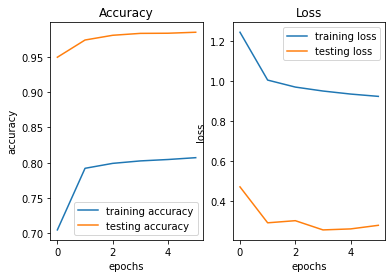

Epoch 1/20
1875/1875 [==============================] - 33s 17ms/step - loss: 1.7497 - accuracy: 0.5258 - val_loss: 0.6652 - val_accuracy: 0.9532
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 1.5588 - accuracy: 0.6124 - val_loss: 0.7033 - val_accuracy: 0.9643
Epoch 3/20
1875/1875 [==============================] - 33s 17ms/step - loss: 1.5301 - accuracy: 0.6198 - val_loss: 0.6573 - val_accuracy: 0.9738
Epoch 4/20
1875/1875 [==============================] - 33s 17ms/step - loss: 1.5137 - accuracy: 0.6236 - val_loss: 0.6005 - val_accuracy: 0.9763
Epoch 5/20
1875/1875 [==============================] - 33s 17ms/step - loss: 1.5019 - accuracy: 0.6258 - val_loss: 0.5260 - val_accuracy: 0.9794
Epoch 6/20
1875/1875 [==============================] - 33s 17ms/step - loss: 1.4922 - accuracy: 0.6272 - val_loss: 0.5878 - val_accuracy: 0.9822
Epoch 7/20
1875/1875 [==============================] - 33s 18ms/step - loss: 1.4834 - accuracy: 0.6284 - val_loss: 0.5541 -

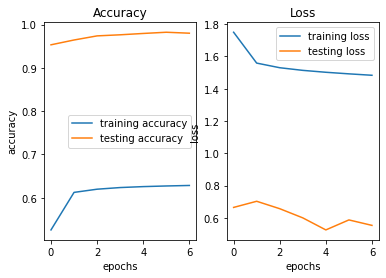

Epoch 1/20
1875/1875 [==============================] - 34s 18ms/step - loss: 2.0871 - accuracy: 0.3500 - val_loss: 1.1005 - val_accuracy: 0.9169
Epoch 2/20
1875/1875 [==============================] - 33s 18ms/step - loss: 1.9629 - accuracy: 0.4329 - val_loss: 1.0509 - val_accuracy: 0.9517
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 1.9390 - accuracy: 0.4407 - val_loss: 0.9817 - val_accuracy: 0.9625
Epoch 4/20
1875/1875 [==============================] - 33s 17ms/step - loss: 1.9269 - accuracy: 0.4444 - val_loss: 0.9229 - val_accuracy: 0.9663
Epoch 5/20
1875/1875 [==============================] - 34s 18ms/step - loss: 1.9174 - accuracy: 0.4465 - val_loss: 0.9360 - val_accuracy: 0.9702
Epoch 6/20
1875/1875 [==============================] - 34s 18ms/step - loss: 1.9106 - accuracy: 0.4475 - val_loss: 0.9182 - val_accuracy: 0.9707
Epoch 7/20
1875/1875 [==============================] - 33s 18ms/step - loss: 1.9046 - accuracy: 0.4492 - val_loss: 0.8677 -

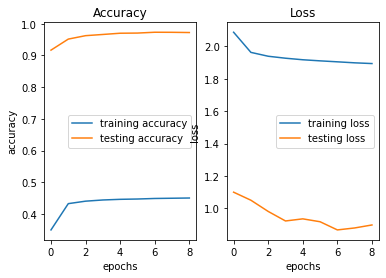

Epoch 1/20
1875/1875 [==============================] - 33s 18ms/step - loss: 2.2710 - accuracy: 0.1840 - val_loss: 1.7484 - val_accuracy: 0.7614
Epoch 2/20
1875/1875 [==============================] - 33s 18ms/step - loss: 2.2217 - accuracy: 0.2496 - val_loss: 1.5455 - val_accuracy: 0.8883
Epoch 3/20
1875/1875 [==============================] - 33s 18ms/step - loss: 2.2061 - accuracy: 0.2610 - val_loss: 1.5001 - val_accuracy: 0.9224
Epoch 4/20
1875/1875 [==============================] - 33s 18ms/step - loss: 2.1974 - accuracy: 0.2660 - val_loss: 1.4807 - val_accuracy: 0.9382
Epoch 5/20
1875/1875 [==============================] - 33s 18ms/step - loss: 2.1918 - accuracy: 0.2676 - val_loss: 1.4296 - val_accuracy: 0.9410
Epoch 6/20
1875/1875 [==============================] - 33s 17ms/step - loss: 2.1875 - accuracy: 0.2697 - val_loss: 1.3947 - val_accuracy: 0.9465
Epoch 7/20
1875/1875 [==============================] - 33s 18ms/step - loss: 2.1833 - accuracy: 0.2705 - val_loss: 1.3912 -

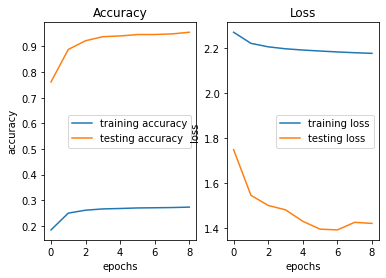

Epoch 1/20
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3053 - val_accuracy: 0.1052
Epoch 2/20
1875/1875 [==============================] - 33s 18ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3041 - val_accuracy: 0.1200
Epoch 3/20
1875/1875 [==============================] - 33s 18ms/step - loss: 2.3025 - accuracy: 0.1041 - val_loss: 2.3041 - val_accuracy: 0.0861
Epoch 4/20
1875/1875 [==============================] - 33s 18ms/step - loss: 2.3023 - accuracy: 0.1047 - val_loss: 2.3051 - val_accuracy: 0.0550
Epoch 4: early stopping
With randomization of  100  percent in y_train...............


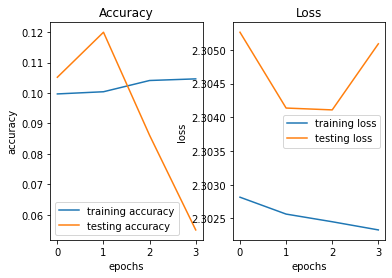

In [ ]:
random_percent = [20,40,60,80,100]
for index,percent in enumerate(random_percent):
  y_train = randomize(y_train_original,percent)
  model_r = model_architecture()
  # model.compile(keras.optimizers.SGD, loss=keras.losses.categorical_crossentropy, metrics=list(keras.metrics.Accuracy))
  model_r.compile(optimizer = "sgd",loss='categorical_crossentropy',metrics=["accuracy"])
  callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',verbose=1, patience=2,mode="auto",restore_best_weights = True)
  callback1 = keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1, patience=2,mode="auto",restore_best_weights = True)                                
  history_r = model_r.fit(x_train,y_train,batch_size = 32,epochs = 20,verbose = 1,callbacks = [callback,callback1],validation_data=(x_test,y_test))
  plt.subplot(1,2,1)
  plt.plot(history_r.history['accuracy'], label='training accuracy')
  plt.plot(history_r.history['val_accuracy'], label='testing accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(history_r.history['loss'], label='training loss')
  plt.plot(history_r.history['val_loss'], label='testing loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()
  print("With randomization of ", percent," percent in y_train...............")
  plt.show()


Conclusion:
Even upto the 80 percent randomization, we can see that teseting accuracy was above 90 percent but the training accuracy has gone down significantly from 40 percent of randomization. 
Due to randomization, the model gets confused on the data provided that may be the reason as similar data having different labels.